<a href="https://colab.research.google.com/github/cj2001/trump_tweets/blob/colab_notebook/twitter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install GetOldTweets3

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GetOldTweets3 as got

## Mount the Google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

## Now we collect the tweets.  (Use this cell if the tweets have not already been collected...otherwise use the cell to load it in from CSV below.)

`setMaxTweets(-1)` indicates that we want to collect all of the tweets matching this criteria.  A positive integer, `n`, means to collect the most recent `n` tweets.

**Note:** For Donald Trump (~48k tweet), this can take up to about 20 minutes to run.  So sit back and relax.  It is recommended that this data be saved as a CSV (see below) so you can skip this step for future runs.

In [4]:
tweetCriteria = got.manager.TweetCriteria().setUsername("realDonaldTrump").setMaxTweets(-1)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
for tweet in tweets[0:10]:
    print(tweet.text + '\n')

....and native culture – S.216/Spokane Tribe, S.256/Native Languages and NDAA Sec. 2870 officially recognizing Little Shell Tribe of Chippewa Indians. My great honor to do so!

Thank YOU Indian Country for being such an IMPORTANT part of the American story! I recently signed 3 bills to support tribal sovereignty....

“Trump Stock Market rally is far outpacing past U.S. presidents” @CNBC With new trade deals, and more, THE BEST IS YET TO COME!

Speaker Pelosi and Chuck Schumer’s drive to try and rig the trial against the President is misplaced. There is no factual basis for the Articles of Impeachment that passed the House. This President will be exonerated.” William McGinley @foxandfriends

Thank you Kristy, have a great year!

Academy Award winning actor (and great guy!) @jonvoight is fantastic in the role of Mickey Donovan in the big television hit, Ray Donovan. From Midnight Cowboy to Deliverance to The Champ (one of the best ever boxing movies), &amp; many others, Jon delivers BIG.

In [5]:
len(tweets)

40896

## We now assemble a data frame of dates and tweets and save that to a .csv file to save time on the tweet collection for future analyses.

In [0]:
temp_dates = [tweet.formatted_date for tweet in tweets]
temp_tweets = [tweet.text for tweet in tweets]
df = pd.DataFrame()
df['date'] = temp_dates
df['tweet'] = temp_tweets

df.to_csv('trump_tweets.csv', sep=',', columns=None, header=True, index=False)
#!cp trump_tweets.csv drive/My\ Drive/Colab\ Notebooks/

In [8]:
df.head()

,date,tweet
0,Fri Dec 27 16:37:20 +0000 2019,"....and native culture – S.216/Spokane Tribe, ..."
1,Fri Dec 27 16:37:20 +0000 2019,Thank YOU Indian Country for being such an IMP...
2,Fri Dec 27 14:42:30 +0000 2019,“Trump Stock Market rally is far outpacing pas...
3,Fri Dec 27 14:28:33 +0000 2019,Speaker Pelosi and Chuck Schumer’s drive to tr...
4,Fri Dec 27 14:16:44 +0000 2019,"Thank you Kristy, have a great year!"


## Now lets work to visualize this a bit.

For this, we will look at some word clouds.  Simple examples for how to use word clouds can be found [here](https://www.tutorialspoint.com/create-word-cloud-using-python) and [here](https://www.datacamp.com/community/tutorials/wordcloud-python).

There are more efficient ways to do this step (such as tokenization and stop word removal via the Python `nltk` package), but this is just to make a quick point.

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

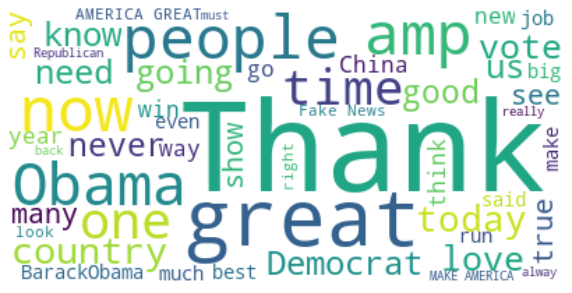

In [66]:
stopwords = set(STOPWORDS)
stopwords.update(["realDonaldTrump", "Donald Trump", "Trump", "Donald-Trump", "Donald", "Mr", "will", "ly", "bit", "want", "President"])
text = " ".join(tweet.text for tweet in tweets[1:])  # Note that tweets[0] is the actual full Tweet instance, so must start with index 1

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##While this is interesting...

Donald Trump has had his Twitter account since 2014.  He has certainly changed what he tweets about in that time frame, so we should consider how his tweeting patterns have changed over time.

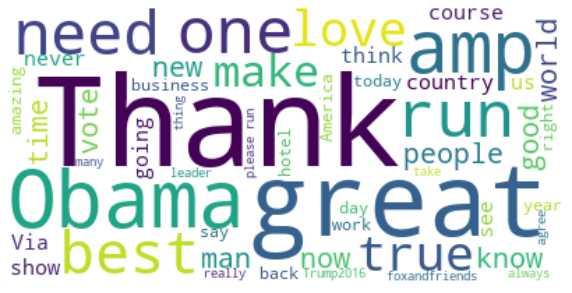

In [67]:
from datetime import datetime

def get_tweets_of_year(tweets, year):

  temp_text = []

  for tweet in tweets:
    this_date = tweet.date
    if this_date.year == year:
      temp_text.append(tweet.text)

  text_of_year = " ".join(w for w in temp_text)

  return text_of_year

text2014 = get_tweets_of_year(tweets[1:], 2014)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(text2014)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

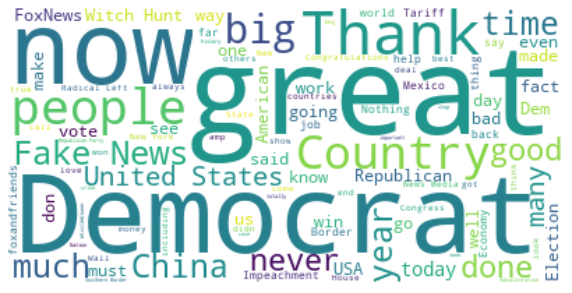

In [69]:
text2019 = get_tweets_of_year(tweets[1:], 2019)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text2019)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##But I was curious...

The above word cloud from the whole of 2019 does not feature "impeachment."  It then occurred to me that this dominated the news cycle towards the end of the year.  So I decided to look specifically at the month of December of 2019.

In [0]:
def get_tweets_of_month(tweets, year, month):

  temp_text = []

  for tweet in tweets:
    this_date = tweet.date
    if this_date.year == year and this_date.month == month:
      temp_text.append(tweet.text)

  text_of_month = " ".join(w for w in temp_text)

  return text_of_month


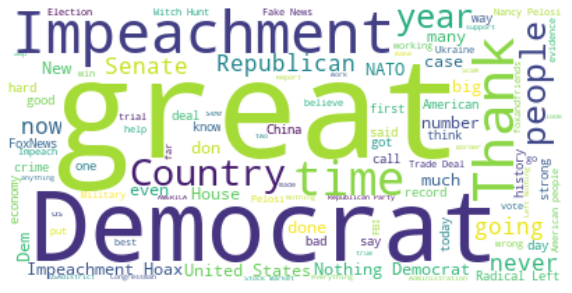

In [72]:
text201912 = get_tweets_of_month(tweets[1:], 2019, 12)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text201912)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Now we will import the sentiment training set
This is hosted on Kaggle [here](https://www.kaggle.com/kazanova/sentiment140#training.1600000.processed.noemoticon.csv)

In [0]:
#pip install kaggle-cli

import os
#import kaggle-cli

os.environ['KAGGLE_USERNAME'] = "cj2001" # username from the json file
os.environ['KAGGLE_KEY'] = "ee70ae45d03a558819ff0262533a006b" # key from the json file
!kaggle datasets download -d kazanova/sentiment140 -p gdrive/My\ Drive/Colab\ Notebooks/ # api copied from kaggle

sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip *.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [0]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
twitter_corpus = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
twitter_corpus.drop(['ids','flag','date','user'],axis=1,inplace=True)
# df['target']=df['target'].apply(lambda x: x/4)
twitter_corpus.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## The column meanings are described on the Kaggle download site.

However, the important one is target, which is the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive).  We will use this data set to train a model and then put the Trump tweets through it.  (We could normalize this column with the commented out line above.)

See [this link](https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis) to continue on with this analysis.